# Results

RandomForestClassifier = 96.7%

# Analyzing and Building a Classification Model for the Iris data set

The following exploratory analysis on the well-known iris dataset is to see whether modern classification models could accurately recognize patterns in the features of an iris flower to determine its species.

## 1. Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the data and view

In [ ]:
# Load data into a Pandas dataframe
data = sns.load_dataset("iris")

# View a sample of the data
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
125,7.2,3.2,6.0,1.8,virginica
102,7.1,3.0,5.9,2.1,virginica
76,6.8,2.8,4.8,1.4,versicolor
12,4.8,3.0,1.4,0.1,setosa


In [ ]:
# View the entirety of the dataset
data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [ ]:
# View the distribution of species
data.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

From the above, we could see that the dataset contains 150 observations of irises. Each observation has 4 features and 1 target name i.e. sepal_length, sepal_width, petal_length and petal_width as its features and the species as its target name. The data set has been split equally between the 3 species (setosa, virginica and versicolor).

## 3. Visualize the data

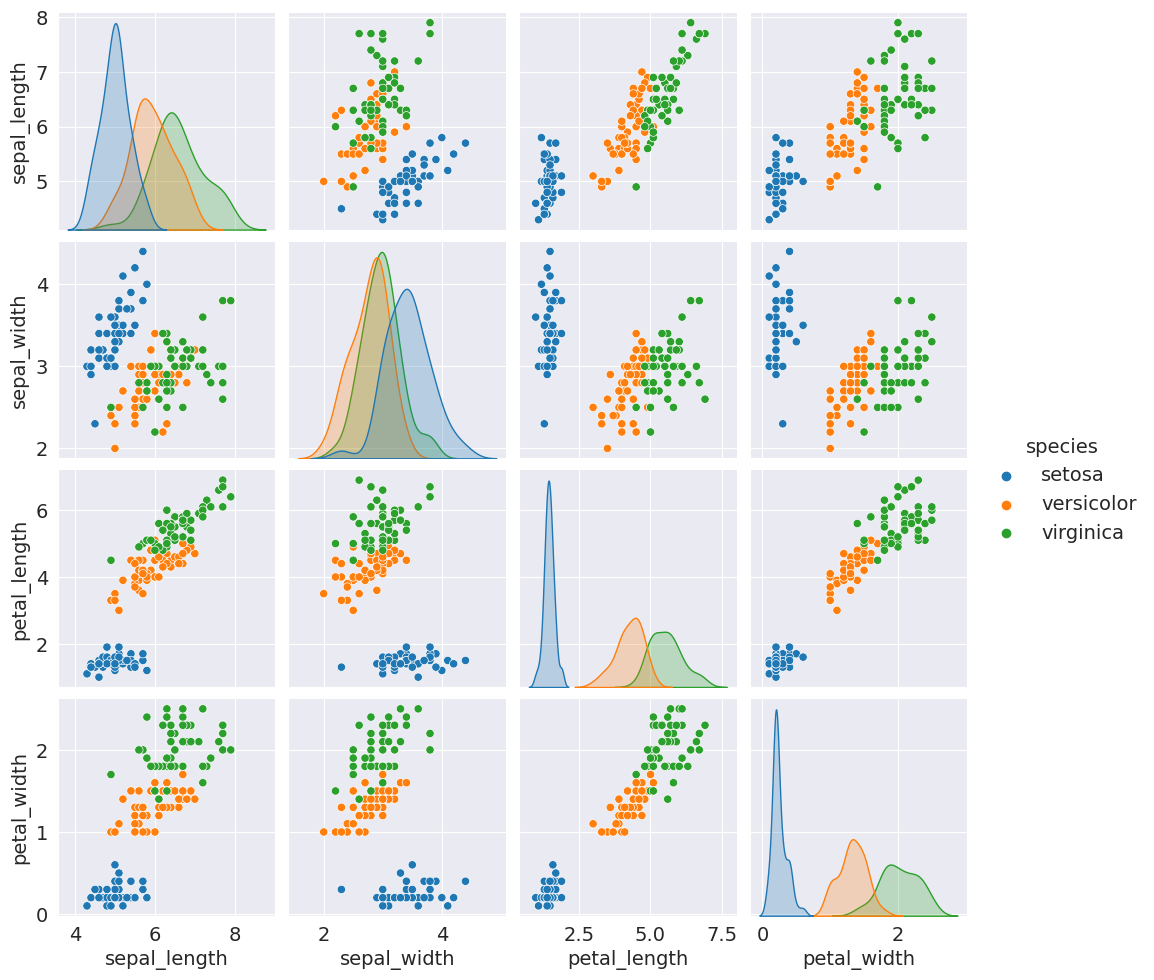

In [ ]:
# Set styles of graph
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 7)

# Create a scatterplot matrix
sns.pairplot(data, hue="species")

From the above we see that setosa irises set itself apart heavily from the other two species when comparing their features with the other species. Versicolor and virginica does however show a certain degree of separation but the similarities of their features group themselves together enough that it may be difficult to achieve a good classification result.

## 4. Splitting the dataset to features and target

In [ ]:
# Convert the column names into the features
X = data.iloc[:, 0:4] # Take all rows but only column 0 up to but not including 4

# Convert the species column name into the target variable
Y = data.species

In [ ]:
# Double check the shape of the features
X.shape

(150, 4)

In [ ]:
# Double check the shape of the target
Y.shape

(150,)

## 5. Building the Classification Model

In [ ]:
# Build a Random Forest Model
clf = RandomForestClassifier()

In [ ]:
# Fit the features and target onto the model
clf.fit(X, Y)

RandomForestClassifier()

In [ ]:
# Check which features are the most importent when making classifications
print(clf.feature_importances_)

[0.1109353  0.02454436 0.48917599 0.37534435]


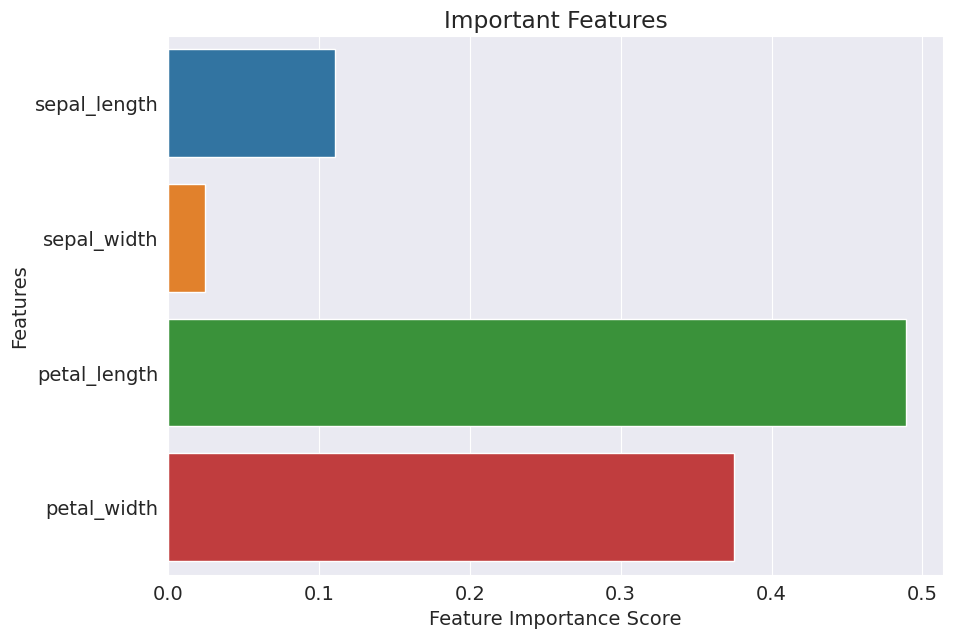

In [ ]:
# Get the feature importance and column names into columns for vizualization
feature_names = data.columns[0:4]
feature_impt = clf.feature_importances_

sns.barplot(x=feature_impt, y=feature_names, orient ='h')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

We can now visually see that the model is prioritiizing petal_length at 0.489 the most while sepal_width at 0.0245 at the lowest. This means that the petal_length and petal_width is the most identifying factor when classifying the irises.

## 6. Make a Prediction

In [ ]:
# Predict on the first observation of subset X
print(clf.predict(X.iloc[[0]])) # Double brackets to convert to 2d array

['setosa']


In [ ]:
# Probability of first observation of subset x being setosa
print(clf.predict_proba(X.iloc[[0]]))

[[1. 0. 0.]]


We se that the first observation of subset X is classified as setosa with a confidence level of 100%. This may be expected because setosa is the most identifying species of the 3 as stated previously. Next we will try to split the dataset so as to test the accuracy of the model.

## 7. Data Split (80/20 ratio)

In [ ]:
# Split to training and test datasets at 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Fit the new subsets onto the model that we already built
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Predict on the test subset
print(clf.predict(X_test))

['virginica' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'virginica']


In [ ]:
# Get te accuracy score of the classification
print(clf.score(X_test, Y_test))

0.9666666666666667


## 8. Conclusion

Now, we can see that the model reaches and accuracy of 96.7%. This is to be expected as previously we said that veriscolor and virginica are more identical together in terms of their features hence the model would not be able distinguish between the two accuarately. A recommendation is to take in more features that better separate the 2 species in order for a more accurate classification.